<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-2-public/blob/adding_C2/C2/W1/ungraded_labs/C2_W1_Lab_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

##### Copyright 2018 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite Models

## Setup

In [3]:
try:
    %tensorflow_version 2.x
except:
    pass

In [4]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.9.2


## Create a Basic Model of the Form y = mx + c

In [5]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 610ms/step - loss: 2.8414
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 2.3896
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 2.0310
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 1.7457
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 1.5182
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 1.3363
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 1.1902
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0724
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.9770
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.8992
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 0.8353
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7824
Epoch 13/200
1/1 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 105/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0924
Epoch 106/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0905
Epoch 107/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 108/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0868
Epoch 109/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 110/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0833
Epoch 111/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0815
Epoch 112/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 113/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0782
Epoch 114/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 115/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0750
Epoch 116/200
1/1 [==============================] - 

## Generate a SavedModel

In [6]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


## Convert the SavedModel to TFLite

In [7]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

2022-11-01 00:31:04.349016: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-01 00:31:04.349045: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.


In [8]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

1052

## Initialize the TFLite Interpreter To Try It Out

In [9]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

## Visualize the Model

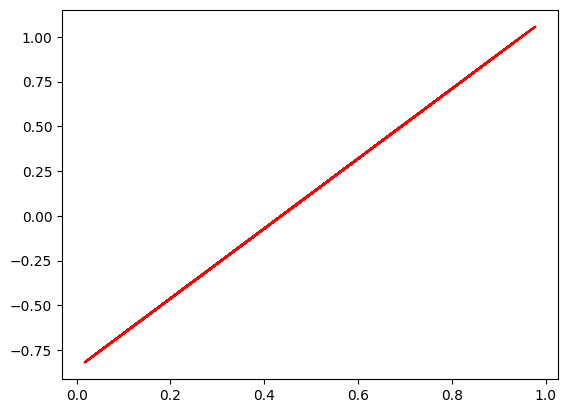

In [11]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass